[(0, 1.6103981021409466), (1, 1.7211370741351406), (2, 2.10904725221058), (3, 3.1841668643942476), (4, 6.196474268885945), (5, 16.145308428561954), (6, 59.60226354082459), (7, 346.74285026915345)]
n = 0, Inverse[0,0] = 1.6103981021409466
n = 1, Inverse[0,0] = 1.7211370741351406
n = 2, Inverse[0,0] = 2.10904725221058
n = 3, Inverse[0,0] = 3.1841668643942476
n = 4, Inverse[0,0] = 6.196474268885945
n = 5, Inverse[0,0] = 16.145308428561954
n = 6, Inverse[0,0] = 59.60226354082459
n = 7, Inverse[0,0] = 346.74285026915345


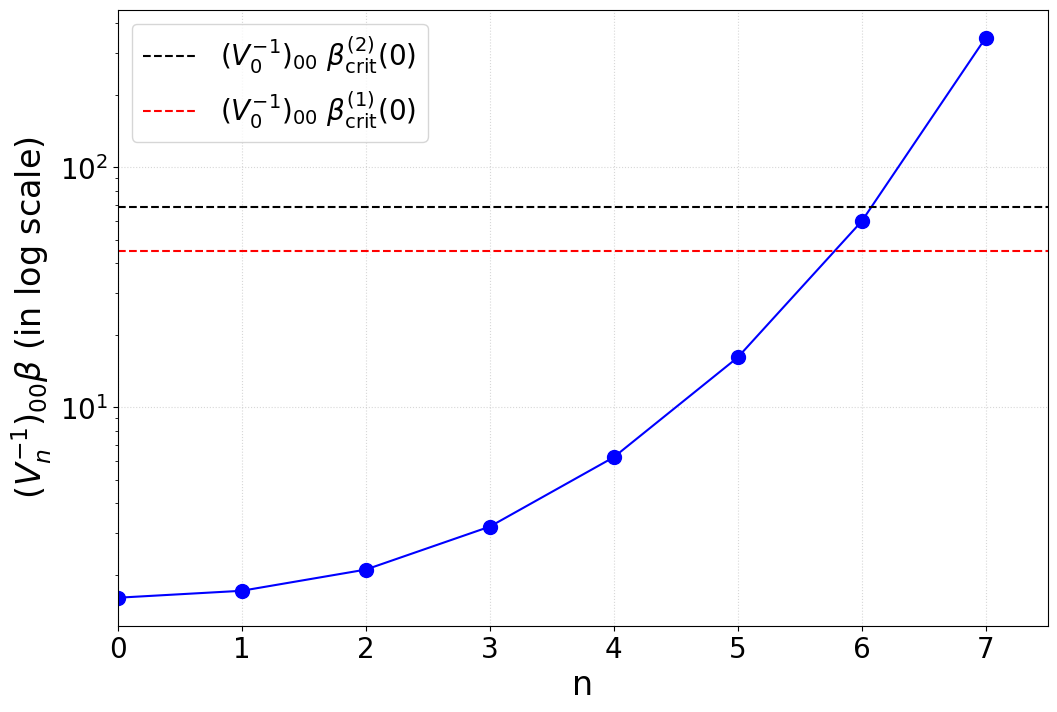

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import math

def C(x,y):
    return math.comb(x,y)

def calculate_y_bar(S,p):
    alpha_s = np.array([p**s * (1-p)**(S-s) * C(S, s)+ (1/S) * (1-p)**S for s in range(1, S+1)])
    y_s = np.array([s-1 for s in range(1, S+1)])
    return np.dot(np.transpose(y_s), alpha_s)

def calculate_sigma(S,p, y_bar):
    alpha_s = np.array([p**s * (1-p)**(S-s) * C(S, s)+ (1/S) * (1-p)**S for s in range(1, S+1)])
    y_s = np.array([s-1 for s in range(1, S+1)])
    return np.sum((y_s - y_bar)**2 * alpha_s)

def calculate_eta(i, S, p, y_bar):
    alpha_i = p**i * (1-p)**(S-i) * C(S, i)+ (1/S) * (1-p)**S
    y_i = i - 1
    return alpha_i * (y_i - y_bar)

def create_matrix(n, p, S):
    y_bar = calculate_y_bar(S,p)
    sigma = calculate_sigma(S,p, y_bar)
    matrix = np.zeros((n+1, n+1))
    matrix[0, 0] = sigma
    
    for i in range(1, n+1):
        eta_i = calculate_eta(i, S, p, y_bar)
        matrix[0, i] = eta_i
        matrix[i, 0] = eta_i
    
    for i in range(1, n+1):
        for j in range(1, n+1):
            alpha_i = p**i * (1-p)**(S-i) * C(S, i)+ (1/S) * (1-p)**S
            alpha_j = p**j * (1-p)**(S-j) * C(S, j)+ (1/S) * (1-p)**S
            if i == j:
                matrix[i, j] = alpha_i * (1 - alpha_i)
            else:
                matrix[i, j] = -alpha_i * alpha_j
    
    return matrix

results = []

S = 10
p=0.5
beta=4
v00 = create_matrix(0, p, S)
for n in range(0, 8):
    matrix = create_matrix(n, p, S)          # Create the matrix
    
    # Calculate the inverse of the matrix
    try:
        inv_matrix = np.linalg.inv(matrix)
        inv_00_element = inv_matrix[0, 0]
    except np.linalg.LinAlgError:
        inv_00_element = "Not invertible"
    
    
    results.append((n, beta*inv_00_element))   # Append results

print(results)

# Print results
#for n, inv_00 in results:
#    print(f"n = {n}, Inverse[0,0] = {inv_00}")

with open("n_vs_v_inv_beta=4.txt", "w") as file:
    for n, inv_00 in results:
        print(f"n = {n}, Inverse[0,0] = {inv_00}")
        file.write(f"n = {n}, Inverse[0,0] = {inv_00}\n")    
    
n_values = [n for n, inv_00 in results]
inv_00_values = [inv_00 for n, inv_00 in results]



# Plotting the data
plt.figure(figsize=(12, 8))
plt.plot(n_values, inv_00_values, marker='o', linestyle='-', markersize=10, color='blue')
plt.xlabel('n', fontsize=24)
plt.ylabel(r'$(V^{-1}_n)_{00}\beta$ (in log scale)', fontsize=24)
plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True, linestyle=':', alpha=0.5)
plt.xlim(0,7.5)
#plt.ylim(0, 500)
label1=r'$(V^{-1}_0)_{00}~\beta_{\text{crit}}^{(2)}(0)$'
label2=r'$(V^{-1}_0)_{00}~\beta_{\text{crit}}^{(1)}(0)$'
plt.axhline(y=169.08988624/v00[0,0], color='k', linestyle='--', label=label1)
plt.axhline(y=111.85398175/v00[0,0], color='r', linestyle='--', label=label2)
legend= plt.legend(fontsize=20)
#plt.text(7.6, 98/v00[0,0], r'$(V^{-1}_0)_{00}~\beta_{\text{crit}}^{(1)}(0)$', fontsize = 22, color='r')
#plt.text(7.6, 169/v00[0,0], r'$(V^{-1}_0)_{00}~\beta_{\text{crit}}^{(2)}(0)$', fontsize = 22, color='k')
plt.savefig('variation_of_v_inverse_beta=4.jpg', dpi=300, bbox_inches='tight')
plt.show() 

[(0, 3.220796204281893), (1, 3.442274148270281), (2, 4.21809450442116), (3, 6.368333728788495), (4, 12.39294853777189), (5, 32.29061685712391), (6, 119.20452708164918), (7, 693.4857005383069)]
n = 0, Inverse[0,0] = 3.220796204281893
n = 1, Inverse[0,0] = 3.442274148270281
n = 2, Inverse[0,0] = 4.21809450442116
n = 3, Inverse[0,0] = 6.368333728788495
n = 4, Inverse[0,0] = 12.39294853777189
n = 5, Inverse[0,0] = 32.29061685712391
n = 6, Inverse[0,0] = 119.20452708164918
n = 7, Inverse[0,0] = 693.4857005383069


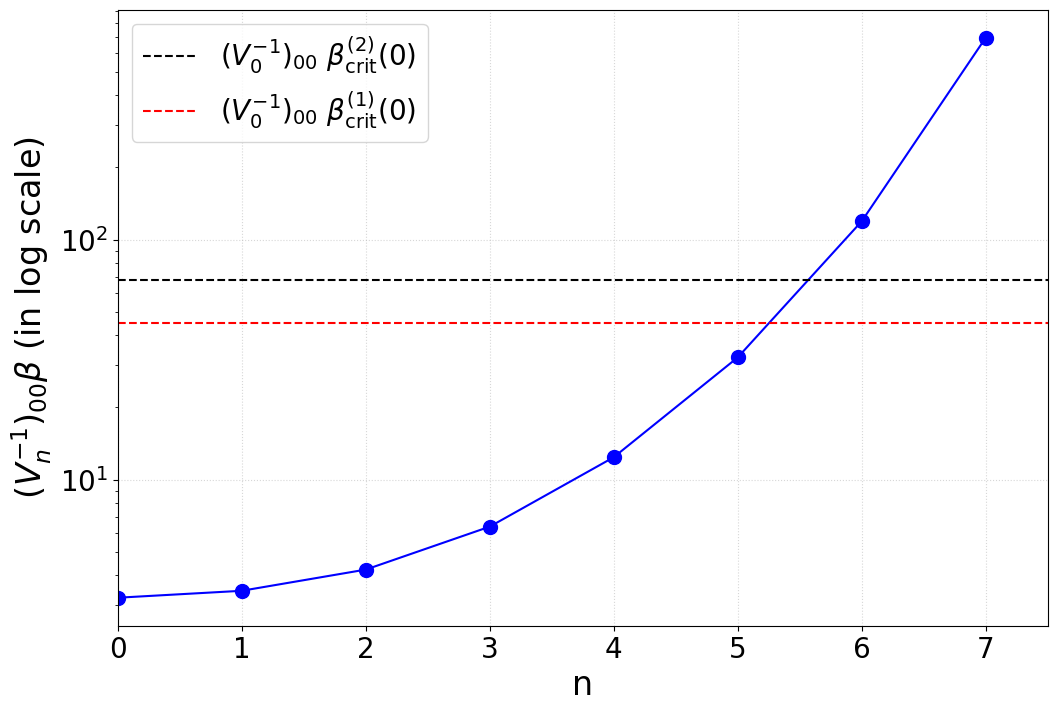

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import math

def C(x,y):
    return math.comb(x,y)

def calculate_y_bar(S,p):
    alpha_s = np.array([p**s * (1-p)**(S-s) * C(S, s)+ (1/S) * (1-p)**S for s in range(1, S+1)])
    y_s = np.array([s-1 for s in range(1, S+1)])
    return np.dot(np.transpose(y_s), alpha_s)

def calculate_sigma(S,p, y_bar):
    alpha_s = np.array([p**s * (1-p)**(S-s) * C(S, s)+ (1/S) * (1-p)**S for s in range(1, S+1)])
    y_s = np.array([s-1 for s in range(1, S+1)])
    return np.sum((y_s - y_bar)**2 * alpha_s)

def calculate_eta(i, S, p, y_bar):
    alpha_i = p**i * (1-p)**(S-i) * C(S, i)+ (1/S) * (1-p)**S
    y_i = i - 1
    return alpha_i * (y_i - y_bar)

def create_matrix(n, p, S):
    y_bar = calculate_y_bar(S,p)
    sigma = calculate_sigma(S,p, y_bar)
    matrix = np.zeros((n+1, n+1))
    matrix[0, 0] = sigma
    
    for i in range(1, n+1):
        eta_i = calculate_eta(i, S, p, y_bar)
        matrix[0, i] = eta_i
        matrix[i, 0] = eta_i
    
    for i in range(1, n+1):
        for j in range(1, n+1):
            alpha_i = p**i * (1-p)**(S-i) * C(S, i)+ (1/S) * (1-p)**S
            alpha_j = p**j * (1-p)**(S-j) * C(S, j)+ (1/S) * (1-p)**S
            if i == j:
                matrix[i, j] = alpha_i * (1 - alpha_i)
            else:
                matrix[i, j] = -alpha_i * alpha_j
    
    return matrix

results = []

S = 10
p=0.5
beta=8
v00 = create_matrix(0, p, S)
for n in range(0, 8):
    matrix = create_matrix(n, p, S)          # Create the matrix
    
    # Calculate the inverse of the matrix
    try:
        inv_matrix = np.linalg.inv(matrix)
        inv_00_element = inv_matrix[0, 0]
    except np.linalg.LinAlgError:
        inv_00_element = "Not invertible"
    
    
    results.append((n, beta*inv_00_element))   # Append results

print(results)

# Print results
#for n, inv_00 in results:
#    print(f"n = {n}, Inverse[0,0] = {inv_00}")

with open("n_vs_v_inv_beta=8.txt", "w") as file:
    for n, inv_00 in results:
        print(f"n = {n}, Inverse[0,0] = {inv_00}")
        file.write(f"n = {n}, Inverse[0,0] = {inv_00}\n")    
    
n_values = [n for n, inv_00 in results]
inv_00_values = [inv_00 for n, inv_00 in results]

# Plotting the data
plt.figure(figsize=(12, 8))
plt.plot(n_values, inv_00_values, marker='o', linestyle='-', markersize=10, color='blue')
plt.xlabel('n', fontsize=24)
plt.ylabel(r'$(V^{-1}_n)_{00}\beta$ (in log scale)', fontsize=24)
plt.yscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True, linestyle=':', alpha=0.5)
plt.xlim(0,7.5)
#plt.ylim(0, 500)

label1=r'$(V^{-1}_0)_{00}~\beta_{\text{crit}}^{(2)}(0)$'
label2=r'$(V^{-1}_0)_{00}~\beta_{\text{crit}}^{(1)}(0)$'
plt.axhline(y=169.08988624/v00[0,0], color='k', linestyle='--', label=label1)
plt.axhline(y=111.85398175/v00[0,0], color='r', linestyle='--', label=label2)
legend= plt.legend(fontsize=20)
plt.savefig('variation_of_v_inverse_beta=8.jpg', dpi=300, bbox_inches='tight')
plt.show()    
